В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cars_df = pd.read_csv('/content/drive/MyDrive/Data Science/cars.csv')

**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [5]:
cars_df.Brand.unique()

array(['Toyota', 'Honda', 'Ford', 'Maruti', 'Hyundai', 'Tata', 'Mahindra',
       'Volkswagen', 'Audi', 'BMW', 'Mercedes'], dtype=object)

In [6]:
cars_df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [7]:
cars_df.Fuel_Type.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [8]:
cars_df.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [9]:
cars_df.Owner_Type.unique()

array(['First', 'Second', 'Third'], dtype=object)

In [10]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


**Висновок:**
В наборі даних 13 колонок: 8 числових та 5 категоріальних:
- колонки Fuel  та Transmission є бінарними
- колонки Brand, Model є мультикатегоріальних  зі значеннями, для яких немає відношення порядку
- колонка Owner Type - мультикатегоріальна з порядком

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [11]:
X=cars_df.drop('Price', axis=1)
Y=cars_df['Price']

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
#Task 1
cars_df.Fuel_Type.value_counts()

Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

In [14]:
Fuel_codes = {'Diesel':0, 'Petrol': 1}
cars_df['Fuel_code'] = cars_df.Fuel_Type.map(Fuel_codes)

In [15]:
cars_df.Transmission.value_counts()

Transmission
Automatic    57
Manual       43
Name: count, dtype: int64

In [16]:
Transmission_codes = {'Manual':0, 'Automatic': 1}
cars_df['Transmission_code'] = cars_df.Transmission.map(Transmission_codes)

In [17]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_code,Transmission_code
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000,1,0
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000,1,1
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000,1,1
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000,0,0
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000,0,1


In [18]:
#Task 2
enc = preprocessing.OneHotEncoder()
X_train_encoded = enc.fit(X_train[['Brand']])



In [19]:
X_train_encoded = enc.transform(X_train[['Brand']]).toarray()
X_test_encoded = enc.transform(X_test[['Brand']]).toarray()
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [20]:
column_names = enc.get_feature_names_out(['Brand'])

In [21]:
X_train[column_names] = X_train_encoded
X_test[column_names] = X_test_encoded

In [22]:
#Task 3
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [23]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [24]:
# Task "Model" column transformation
cars_df.Model.unique()

array(['Corolla', 'Civic', 'Mustang', 'Swift', 'Sonata', 'Nexon',
       'Scorpio', 'Polo', 'A4', 'X1', 'C-Class', 'Endeavour', 'Creta',
       'Harrier', 'Ertiga', 'City', 'Tiguan', 'Q3', '5 Series', 'GLC',
       'Innova', 'Figo', 'Verna', 'Altroz', 'Thar', 'Passat', 'A6', 'X3',
       'E-Class', 'Fortuner', 'Aspire', 'Elantra', 'Safari', 'Vitara',
       'WR-V', 'Ameo', 'A3', '7 Series', 'GLE', 'Yaris', 'Ranger',
       'Santro', 'Tigor', 'S-Cross', 'BR-V', 'T-Roc', 'Q7', 'X5', 'GLA',
       'Camry', 'Venue', 'Tiago', 'XUV300', 'Vento', 'A5', '3 Series',
       'Innova Crysta', 'EcoSport'], dtype=object)

In [25]:
model_groups = {
    'Sedan': ['Corolla', 'Civic', 'Sonata', 'Polo', 'A4', 'C-Class', 'City', 'Q3', '5 Series', 'E-Class', 'Passat', 'A6', 'A3', '7 Series', 'Yaris', 'Ameo', 'A5', '3 Series', 'Camry', 'Vento', 'Verna', 'Elantra'],
    'Crossover': ['Nexon', 'Creta', 'Tiguan', 'Harrier', 'X1', 'X3', 'Q7', 'X5', 'GLA', 'T-Roc', 'GLC', 'GLE', 'Venue', 'Innova Crysta', 'Vitara', 'S-Cross', 'WR-V'],
    'SUV': ['Scorpio', 'Endeavour', 'Innova', 'Thar', 'Fortuner', 'Safari', 'Ranger', 'BR-V', 'XUV300', 'Ertiga', 'EcoSport'],
    'Hatchback': ['Swift', 'Figo', 'Altroz', 'Santro', 'Tigor', 'Tiago']
}

In [26]:
def model_to_group(model):
    for group, models in model_groups.items():
        if model in models:
            return group
    return 'Other'

In [27]:
X_train['Body_Type'] = X_train['Model'].apply(model_to_group)
X_test['Body_Type'] = X_test['Model'].apply(model_to_group)

# Не змогла придумати як далі закодувати ці групи на треін та тест даних,
#отримувала помилку що деякі дані в X_test не розпізнані,оскільки модель на них не була тренована.

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [28]:
X_train= X_train.select_dtypes(include=[np.number])

In [29]:
train_data = pd.concat([X_train, Y_train.reset_index(drop=True)], axis=1)

In [30]:
correlation_matrix = train_data.corr()
correlation_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,-0.013220
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.057246
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,0.121312
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.061016
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.041865
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,-0.091369
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.181523
Brand_Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.086245
Brand_BMW,0.048335,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,-0.157757
Brand_Ford,-0.020240,-0.150454,-0.009761,-0.296480,0.184231,0.240501,-0.161451,-0.118678,-0.126761,1.000000,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.190586,0.182092


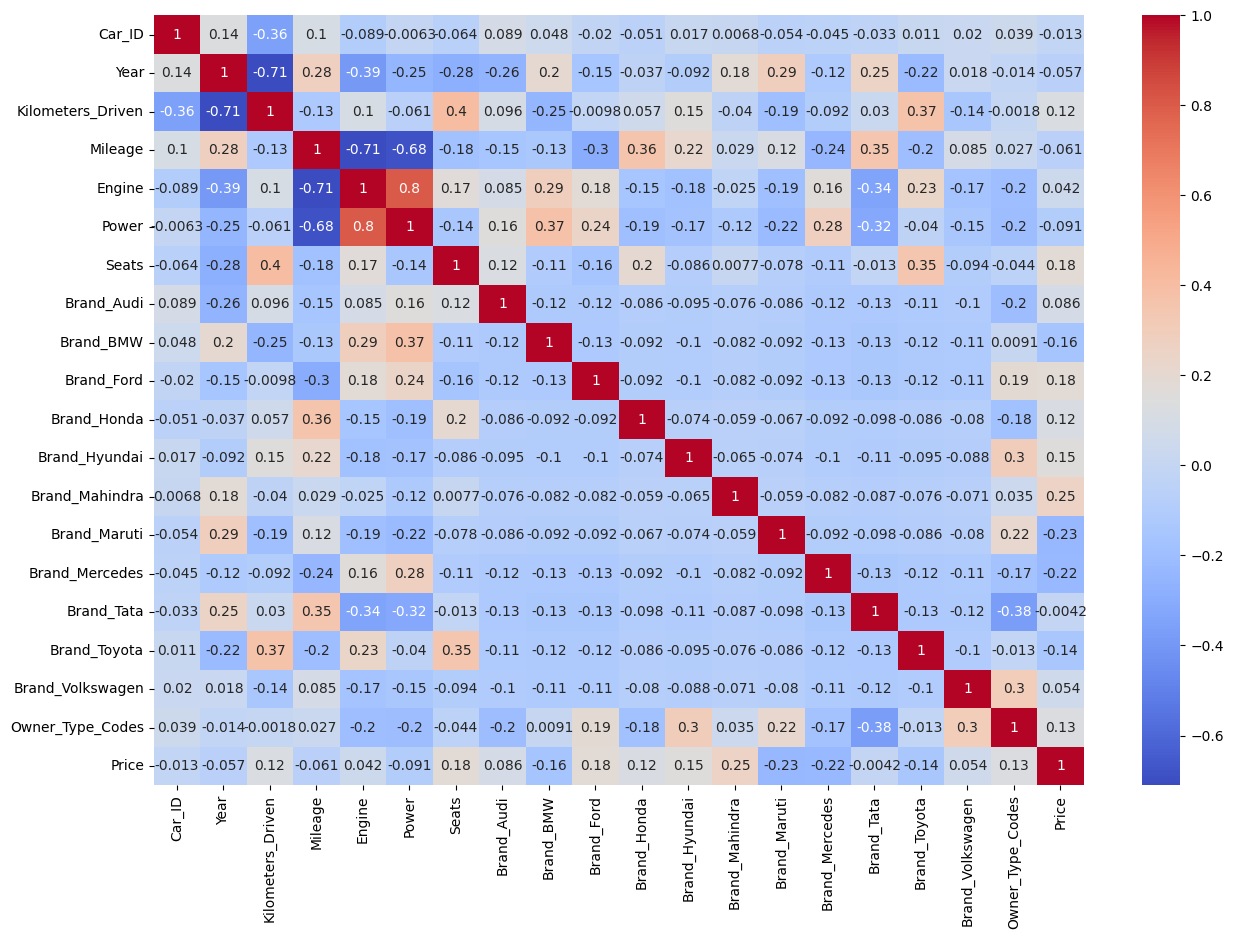

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),cmap='coolwarm', annot=True)
plt.show()


**Висновок**: На жаль, я не побачила змінних,які б корелювали на більше ніж 0.5

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [32]:
X_test= X_test.select_dtypes(include=[np.number])
X_train= X_train.select_dtypes(include=[np.number])

In [33]:
inputs, targets = X_train, Y_train


In [34]:
model = LinearRegression().fit(inputs, targets)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


In [35]:
train_rmse = mean_squared_error(Y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(Y_test, test_predictions, squared=False)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 252657.27724736722
Test RMSE: 248249.61361454346


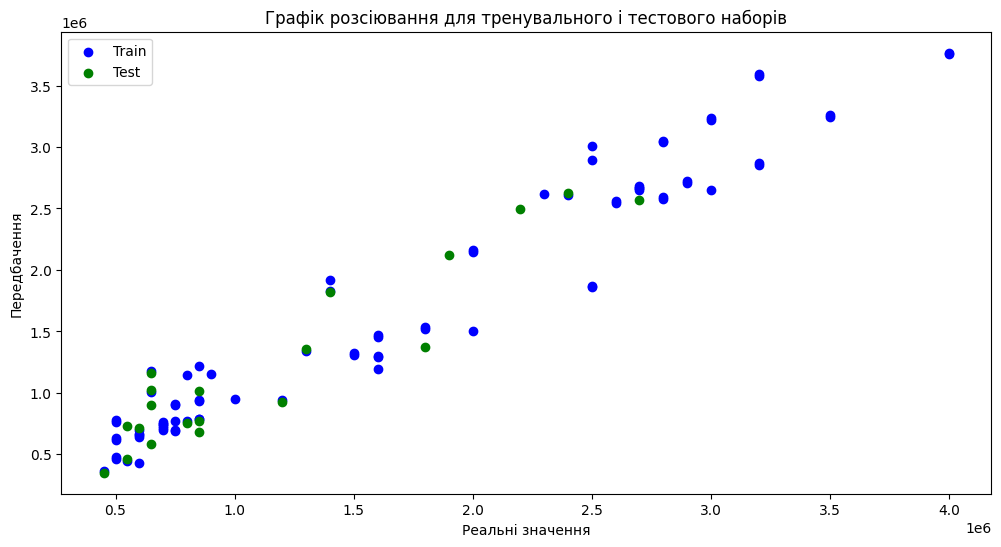

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_train, train_predictions, color='blue', label='Train')
plt.scatter(Y_test, test_predictions, color='green', label='Test')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачення')
plt.title('Графік розсіювання для тренувального і тестового наборів')
plt.legend()
plt.show()

**Висновок**: візуально мені здається що модель непогано передбачила таргетну змінну, проте показник RMSE  на мою думку занадто високий.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [37]:
numeric_col=['Year','Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats' ]

In [38]:
cat_col=['Brand_Audi', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes','Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Owner_Type_Codes']
cat_data_train=X_train[cat_col].values
cat_data_test=X_test[cat_col].values

In [39]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_col]))
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_col]))


In [40]:
inputs_train =np.concatenate((X_train_scaled,cat_data_train), axis=1)
inputs_test =np.concatenate((X_test_scaled,cat_data_test), axis=1)

In [41]:
columns_names=numeric_col+cat_col

In [42]:
inputs_df_train=pd.DataFrame(inputs_train, columns=columns_names)
inputs_df_test=pd.DataFrame(inputs_test, columns=columns_names)


In [43]:
model = LinearRegression().fit(inputs_df_train, Y_train)


In [44]:
train_predictions = model.predict(inputs_df_train)
test_predictions = model.predict(inputs_df_test)
train_rmse = mean_squared_error(Y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(Y_test, test_predictions, squared=False)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


Train RMSE: 252808.49663965995
Test RMSE: 249429.03130771397


In [45]:
model.coef_


array([  24577.81128388,   -2501.99851916,  -27590.85970344,
         89881.0498274 ,  463572.32747412,   78718.85625966,
        803281.75750807,  904873.78796805, -246838.32174284,
       -417352.03555945, -436776.52609784, -491392.50705238,
       -410512.32212755,  912150.23957675, -425167.52655331,
        -85859.16923601, -106407.37668348,  -74990.27438305])

In [46]:
model.intercept_

1651881.5010634193

In [47]:
Y = Y_train
X = inputs_df_train
X = sm.add_constant(X)
model = sm.OLS(Y_train.values,X)
results = model.fit()
print(round(results.params))

const                1514225.0
Year                   24578.0
Kilometers_Driven      -2502.0
Mileage               -27591.0
Engine                 89881.0
Power                 463572.0
Seats                  78719.0
Brand_Audi            940939.0
Brand_BMW            1042531.0
Brand_Ford           -109182.0
Brand_Honda          -279695.0
Brand_Hyundai        -299120.0
Brand_Mahindra       -353736.0
Brand_Maruti         -272856.0
Brand_Mercedes       1049807.0
Brand_Tata           -287511.0
Brand_Toyota           51798.0
Brand_Volkswagen       31249.0
Owner_Type_Codes      -74990.0
dtype: float64


**Висновок**: найбільший позитивний вплив мають такі колонки:Y = targets:
Brand_Mercedes,Brand_BMW, Brand_Audi, Power
найбільш негативнй впли вна ціну мають: Brand_Mahindra, Brand_Hyundai,Brand_Tata, Brand_Honda.  Мені здається що марка машини і справді є вирішальним в ціноутворенні, тому і не дивно що саме марки мають найбіьший вплив на ціну.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [50]:
Y = Y_train
X = inputs_df_train
X = sm.add_constant(X)
model = sm.OLS(Y_train.values,X)
results = model.fit()
print(round(results.params))

const                1514225.0
Year                   24578.0
Kilometers_Driven      -2502.0
Mileage               -27591.0
Engine                 89881.0
Power                 463572.0
Seats                  78719.0
Brand_Audi            940939.0
Brand_BMW            1042531.0
Brand_Ford           -109182.0
Brand_Honda          -279695.0
Brand_Hyundai        -299120.0
Brand_Mahindra       -353736.0
Brand_Maruti         -272856.0
Brand_Mercedes       1049807.0
Brand_Tata           -287511.0
Brand_Toyota           51798.0
Brand_Volkswagen       31249.0
Owner_Type_Codes      -74990.0
dtype: float64


In [51]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     57.35
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.15e-31
Time:                        19:50:11   Log-Likelihood:                -1108.7
No. Observations:                  80   AIC:                             2253.
Df Residuals:                      62   BIC:                             2296.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.514e+06   5.53e+0

**Висновок**: статистично значимі ознаки є:
- Power
-Brand Audi
- Brand BMW
- Brand Mahindra
- Brand Tata
- Brand Hyindai
- Brand Mercedes

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [53]:
Y = Y_train
X = inputs_df_train[['Brand_Audi', 'Brand_BMW', 'Brand_Mahindra', 'Brand_Tata', 'Brand_Hyundai', 'Brand_Mercedes', 'Power']]
X = sm.add_constant(X)
model = sm.OLS(Y_train.values,X)
results = model.fit()
print(round(results.params))

const             1383014.0
Brand_Audi        1051071.0
Brand_BMW         1092914.0
Brand_Mahindra    -217665.0
Brand_Tata        -164670.0
Brand_Hyundai     -319144.0
Brand_Mercedes    1105145.0
Power              564396.0
dtype: float64


In [54]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     113.2
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.95e-36
Time:                        19:59:48   Log-Likelihood:                -1122.0
No. Observations:                  80   AIC:                             2260.
Df Residuals:                      72   BIC:                             2279.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.383e+06   5.45e+04     25.

**Висновок**: після використання лише значущих змінних показники R2 і Adj незначно зменшились. Загалом по даним тесту F-statistcs, R squared, p-value- модель добре працює.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [55]:
Y = Y_train
X = inputs_df_train[['Brand_Audi', 'Brand_BMW', 'Brand_Mahindra', 'Brand_Tata', 'Brand_Hyundai', 'Brand_Mercedes', 'Power', 'Engine', 'Seats', 'Brand_Honda','Brand_Maruti']]
X = sm.add_constant(X)
model = sm.OLS(Y_train.values,X)
results = model.fit()
print(round(results.params))

const             1424604.0
Brand_Audi        1000291.0
Brand_BMW         1099760.0
Brand_Mahindra    -305093.0
Brand_Tata        -193648.0
Brand_Hyundai     -328564.0
Brand_Mercedes    1122677.0
Power              457438.0
Engine             110556.0
Seats               84473.0
Brand_Honda       -244165.0
Brand_Maruti      -244706.0
dtype: float64


In [56]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     91.61
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.68e-36
Time:                        20:13:33   Log-Likelihood:                -1111.0
No. Observations:                  80   AIC:                             2246.
Df Residuals:                      68   BIC:                             2275.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.425e+06   5.89e+04     24.

**Висновок:**
На мою думку остання модель є кращою,
вона має найвищіпоказники R squerad  та Adjusted R squared,
значення F-statistacs високе та значуще, що свідчить про загальну значущість моделі,  AIC та BIC найнижчі що також свідчить про кращу модель з урахуванням її складності